In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
root = '../input/'
# Any results you write to the current directory are saved as output.

## Analyse CSV files and their columns

In [26]:
csv_files = [f for f in listdir(root) if isfile(join(root, f)) and '.csv' in f ]
dataframes = {}
for file in csv_files:
    dataframes[os.path.splitext(file)[0]] = pd.read_csv(root+file)
for i,file in enumerate(csv_files,1):
    print(i,'file name      :',file)
    print('  dataframe shape:',dataframes[os.path.splitext(file)[0]].shape)
    print('  data columns   : ',end='')
    print(*dataframes[os.path.splitext(file)[0]].columns ,sep=', ',end='\n\n')

1 file name      : potential_energy.csv
  dataframe shape: (85003, 2)
  data columns   : molecule_name, potential_energy

2 file name      : mulliken_charges.csv
  dataframe shape: (1533537, 3)
  data columns   : molecule_name, atom_index, mulliken_charge

3 file name      : train.csv
  dataframe shape: (4658147, 6)
  data columns   : id, molecule_name, atom_index_0, atom_index_1, type, scalar_coupling_constant

4 file name      : scalar_coupling_contributions.csv
  dataframe shape: (4658147, 8)
  data columns   : molecule_name, atom_index_0, atom_index_1, type, fc, sd, pso, dso

5 file name      : sample_submission.csv
  dataframe shape: (2505542, 2)
  data columns   : id, scalar_coupling_constant

6 file name      : test.csv
  dataframe shape: (2505542, 5)
  data columns   : id, molecule_name, atom_index_0, atom_index_1, type

7 file name      : magnetic_shielding_tensors.csv
  dataframe shape: (1533537, 11)
  data columns   : molecule_name, atom_index, XX, YX, ZX, XY, YY, ZY, XZ, YZ

## check for aligned columns 

In [27]:
print(dataframes['train']['molecule_name'].equals(dataframes['scalar_coupling_contributions']['molecule_name']),end=' ')
print(dataframes['train']['atom_index_0'].equals(dataframes['scalar_coupling_contributions']['atom_index_0']),end=' ')
print(dataframes['train']['atom_index_1'].equals(dataframes['scalar_coupling_contributions']['atom_index_1']),end=' ')
print(dataframes['train']['type'].equals(dataframes['scalar_coupling_contributions']['type']))      
print('train.csv and scalar_coupling_contributions.csv have aligned columns',end='\n\n')

print(dataframes['potential_energy']['molecule_name'].equals(dataframes['dipole_moments']['molecule_name']))      
print('potential_energy.csv and dipole_moments.csv have aligned columns',end='\n\n')

print(dataframes['test']['id'].equals(dataframes['sample_submission']['id']))      
print('test.csv and sample_submission.csv have aligned columns',end='\n\n')

print(dataframes['mulliken_charges']['molecule_name'].equals(dataframes['magnetic_shielding_tensors']['molecule_name']),end=' ')      
print(dataframes['mulliken_charges']['atom_index'].equals(dataframes['magnetic_shielding_tensors']['atom_index']))      
print('mulliken_charges.csv and magnetic_shielding_tensors.csv have aligned columns',end='\n\n')

True True True True
train.csv and scalar_coupling_contributions.csv have aligned columns

True
potential_energy.csv and dipole_moments.csv have aligned columns

True
test.csv and sample_submission.csv have aligned columns

True True
mulliken_charges.csv and magnetic_shielding_tensors.csv have aligned columns



In [28]:
print(np.array_equal(dataframes['train']['molecule_name'].unique(), dataframes['dipole_moments']['molecule_name'].unique()),end=' ')
print(np.array_equal(dataframes['train']['molecule_name'].unique(), dataframes['mulliken_charges']['molecule_name'].unique()),end=' ')
print(np.array_equal(dataframes['train']['molecule_name'].unique(), dataframes['magnetic_shielding_tensors']['molecule_name'].unique()))
print('All molecules present in train.csv have their additional data present')

True True True
All molecules present in train.csv have their additional data present


In [29]:
train = dataframes['train']
train.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074


## types

In [30]:
type_list = train['type'].unique().tolist()
print('Total {} different coupling types are present in train.csv'.format(len(type_list)))
print(*type_list, sep = ", ")
test_type_list = dataframes['test']['type'].unique().tolist()
print('Total {} different coupling types are present in test.csv'.format(len(test_type_list)))
print(*test_type_list, sep = ", ")

Total 8 different coupling types are present in train.csv
1JHC, 2JHH, 1JHN, 2JHN, 2JHC, 3JHH, 3JHC, 3JHN
Total 8 different coupling types are present in test.csv
2JHC, 1JHC, 3JHH, 3JHC, 2JHH, 1JHN, 3JHN, 2JHN


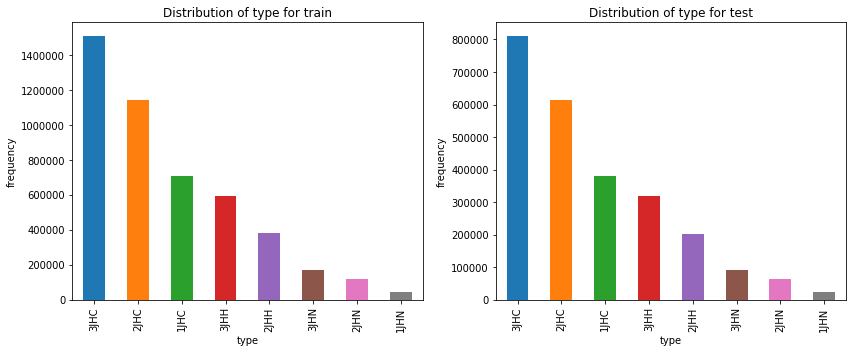

In [31]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title('Distribution of type for train')
plt.ylabel('frequency')
plt.xlabel('type')
train['type'].value_counts().plot.bar()

plt.subplot(1, 2, 2)
plt.title('Distribution of type for test')
plt.ylabel('frequency')
plt.xlabel('type')
dataframes['test']['type'].value_counts().plot.bar()
plt.tight_layout()
plt.show()

## atom index

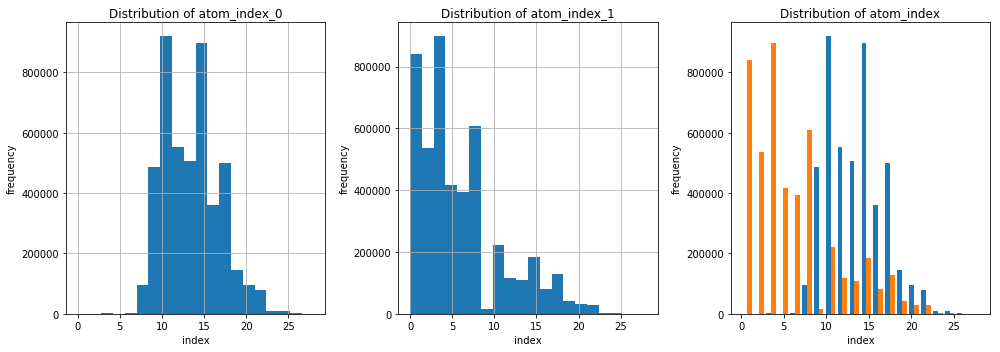

In [32]:
plt.figure(figsize=(14,5))
plt.subplot(1, 3, 1)
plt.title('Distribution of atom_index_0')
plt.ylabel('frequency')
plt.xlabel('index')
train['atom_index_0'].hist(bins=20)

plt.subplot(1, 3, 2)
plt.title('Distribution of atom_index_1')
plt.ylabel('frequency')
plt.xlabel('index')
train['atom_index_1'].hist(bins=20)

plt.subplot(1, 3, 3)
plt.title('Distribution of atom_index')
plt.ylabel('frequency')
plt.xlabel('index')
plt.hist(train[['atom_index_0','atom_index_1']].values,bins=20)

plt.tight_layout()
plt.show()

### Does test set have a similar distribution ?

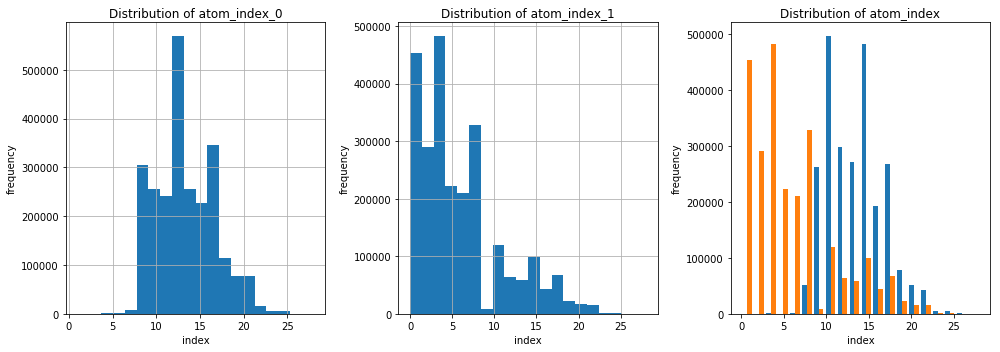

In [33]:
plt.figure(figsize=(14,5))
plt.subplot(1, 3, 1)
plt.title('Distribution of atom_index_0')
plt.ylabel('frequency')
plt.xlabel('index')
dataframes['test']['atom_index_0'].hist(bins=20)

plt.subplot(1, 3, 2)
plt.title('Distribution of atom_index_1')
plt.ylabel('frequency')
plt.xlabel('index')
dataframes['test']['atom_index_1'].hist(bins=20)

plt.subplot(1, 3, 3)
plt.title('Distribution of atom_index')
plt.ylabel('frequency')
plt.xlabel('index')
plt.hist(dataframes['test'][['atom_index_0','atom_index_1']].values,bins=20)

plt.tight_layout()
plt.show()

## scalar coupling constant

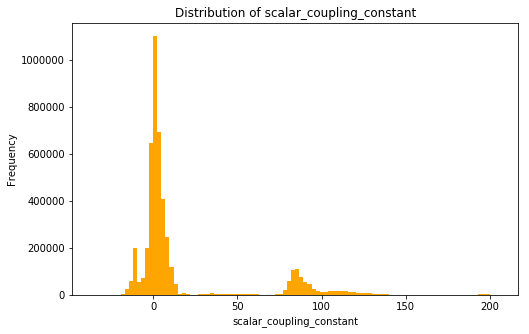

In [34]:
plt.figure(figsize=(8,5))
plt.title('Distribution of scalar_coupling_constant')
plt.ylabel('Frequency')
plt.xlabel('scalar_coupling_constant')
plt.hist(train['scalar_coupling_constant'].values,bins=100,color='orange')
plt.show()

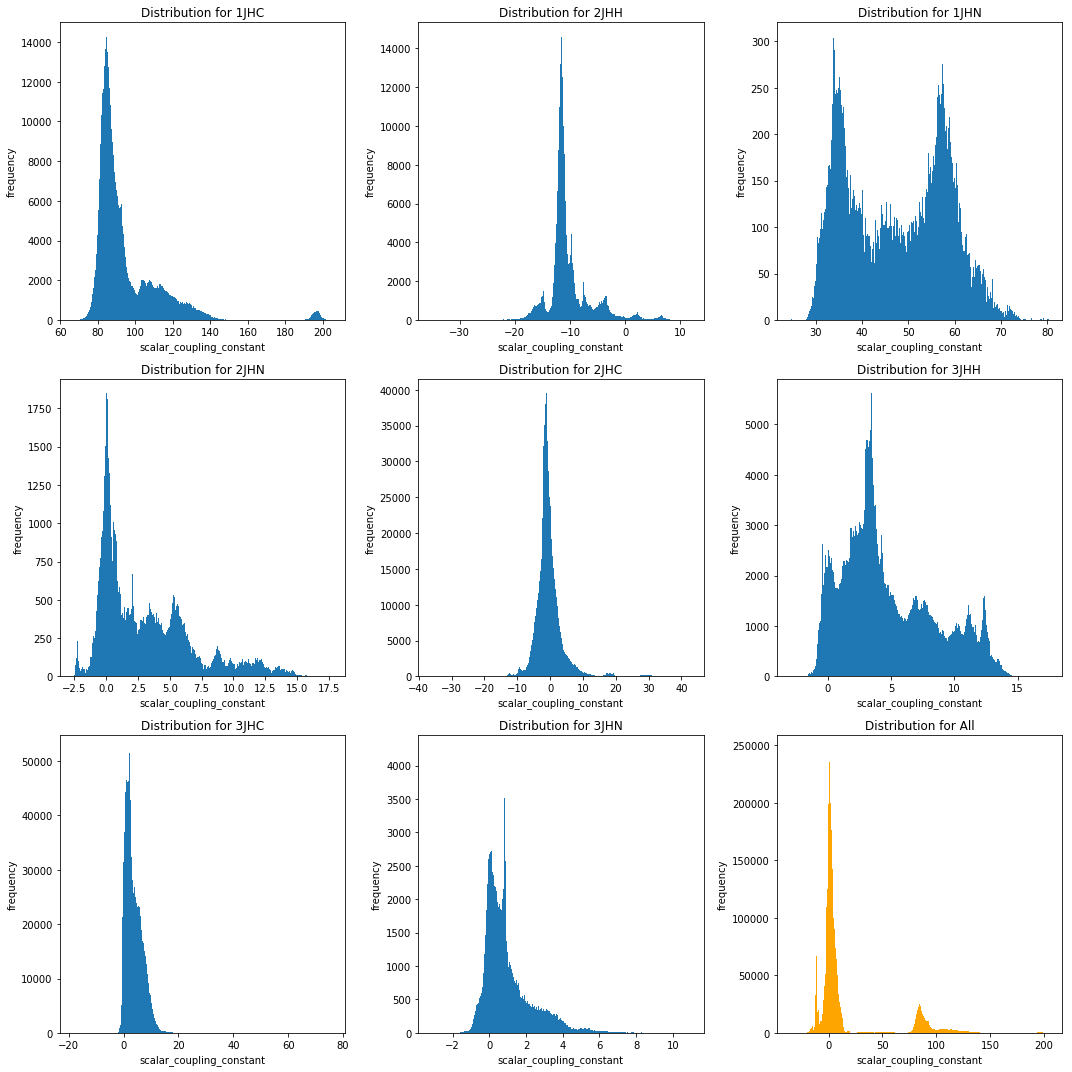

In [35]:
df = train[['type','scalar_coupling_constant']]
plt.figure(figsize=(15,15))

for i,type_ in enumerate(type_list,1):
    plt.subplot(3, 3, i)
    plt.title('Distribution for '+ type_)
    plt.ylabel('frequency')
    plt.xlabel('scalar_coupling_constant')
    plt.hist(df.loc[df['type'] == type_]['scalar_coupling_constant'].values,bins=500)
    #df.loc[df['type'] == type_]['scalar_coupling_constant'].hist(bins=25)
plt.subplot(3, 3, 9)
plt.title('Distribution for All')
plt.ylabel('frequency')
plt.xlabel('scalar_coupling_constant')
plt.hist(df['scalar_coupling_constant'].values,bins=500,color='orange')
plt.tight_layout()
plt.show()

### With Fixed X axis 

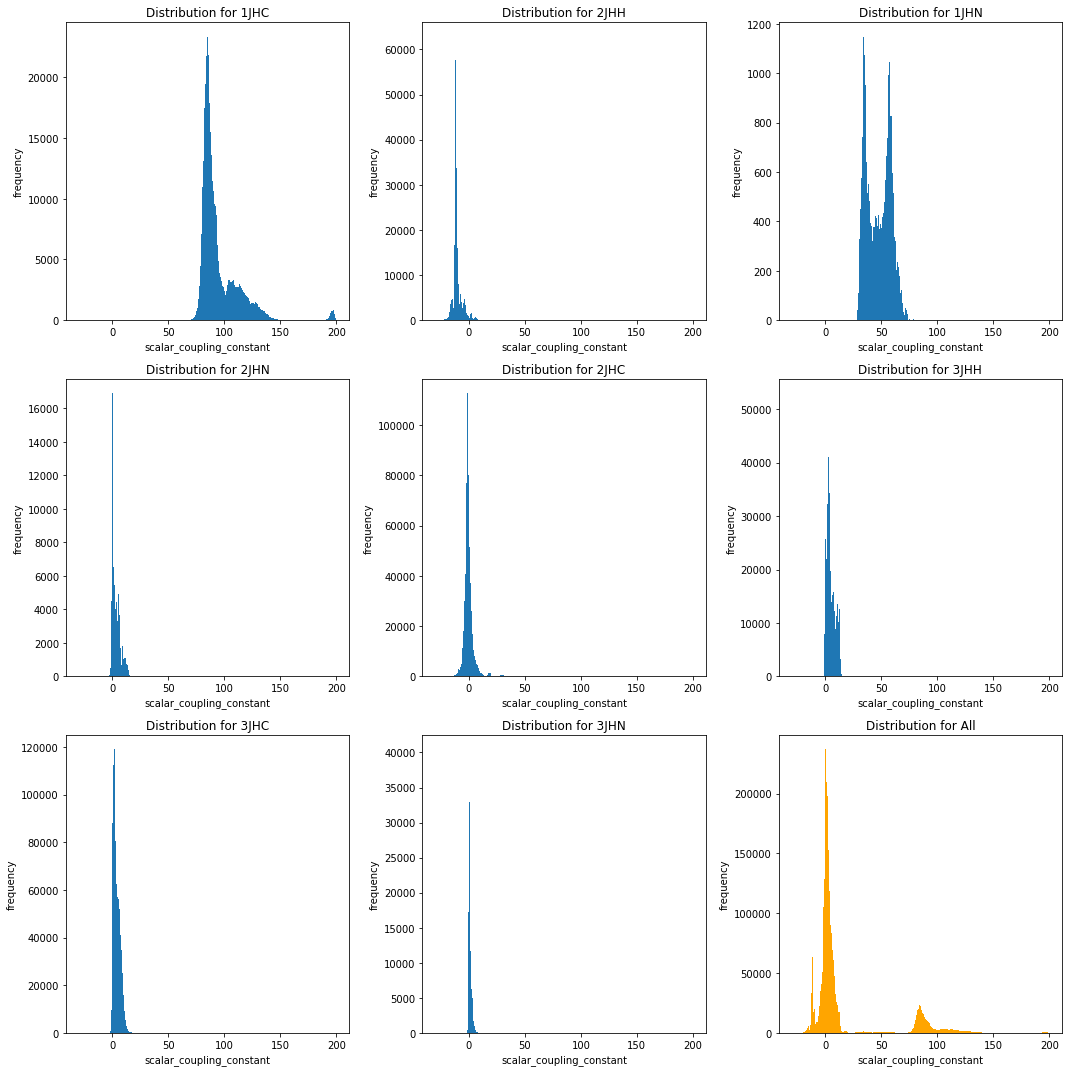

In [36]:
df = train[['type','scalar_coupling_constant']]
plt.figure(figsize=(15,15))
for i,type_ in enumerate(type_list,1):
    plt.subplot(3, 3, i)
    plt.title('Distribution for '+ type_)
    plt.ylabel('frequency')
    plt.xlabel('scalar_coupling_constant')
    plt.hist(df.loc[df['type'] == type_]['scalar_coupling_constant'].values,bins=500,range=(-30,200))
    #df.loc[df['type'] == type_]['scalar_coupling_constant'].hist(bins=25)
plt.subplot(3, 3, 9)
plt.title('Distribution for All')
plt.ylabel('frequency')
plt.xlabel('scalar_coupling_constant')
plt.hist(df['scalar_coupling_constant'].values,bins=500,range=(-30,200),color='orange')
plt.tight_layout()
plt.show()

## dipole Moment

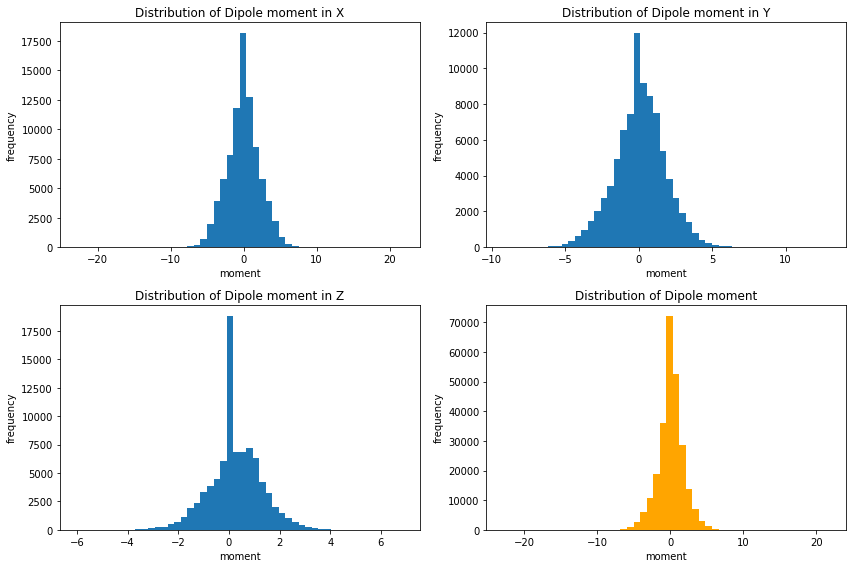

In [37]:
plt.figure(figsize=(12,8))
plt.subplot(2, 2, 1)
plt.title('Distribution of Dipole moment in X')
plt.ylabel('frequency')
plt.xlabel('moment')
plt.hist(dataframes['dipole_moments']['X'].values,bins=50)

plt.subplot(2, 2, 2)
plt.title('Distribution of Dipole moment in Y')
plt.ylabel('frequency')
plt.xlabel('moment')
plt.hist(dataframes['dipole_moments']['Y'].values,bins=50)

plt.subplot(2, 2, 3)
plt.title('Distribution of Dipole moment in Z')
plt.ylabel('frequency')
plt.xlabel('moment')
plt.hist(dataframes['dipole_moments']['Z'].values,bins=50)

plt.subplot(2, 2, 4)
plt.title('Distribution of Dipole moment')
plt.ylabel('frequency')
plt.xlabel('moment')
plt.hist(dataframes['dipole_moments'][['X','Y','Z']].values.reshape(-1),bins=50,color='orange')

plt.tight_layout()
plt.show()

## potential Energy

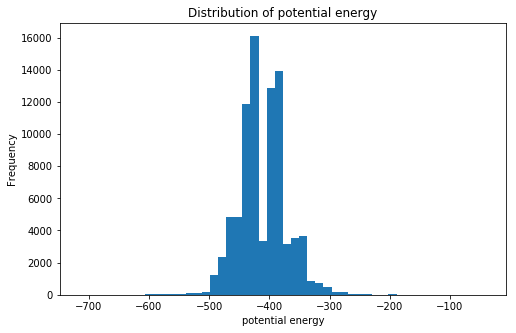

In [38]:
plt.figure(figsize=(8,5))
plt.title('Distribution of potential energy')
plt.ylabel('Frequency')
plt.xlabel('potential energy')
plt.hist(dataframes['potential_energy']['potential_energy'].values,bins=50)
plt.show()

## mulliken charges

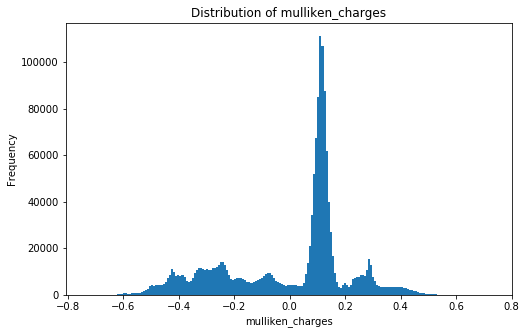

In [39]:
plt.figure(figsize=(8,5))
plt.title('Distribution of mulliken_charges')
plt.ylabel('Frequency')
plt.xlabel('mulliken_charges')
plt.hist(dataframes['mulliken_charges']['mulliken_charge'].values,bins=200)
plt.show()

## magnetic_shielding_tensors

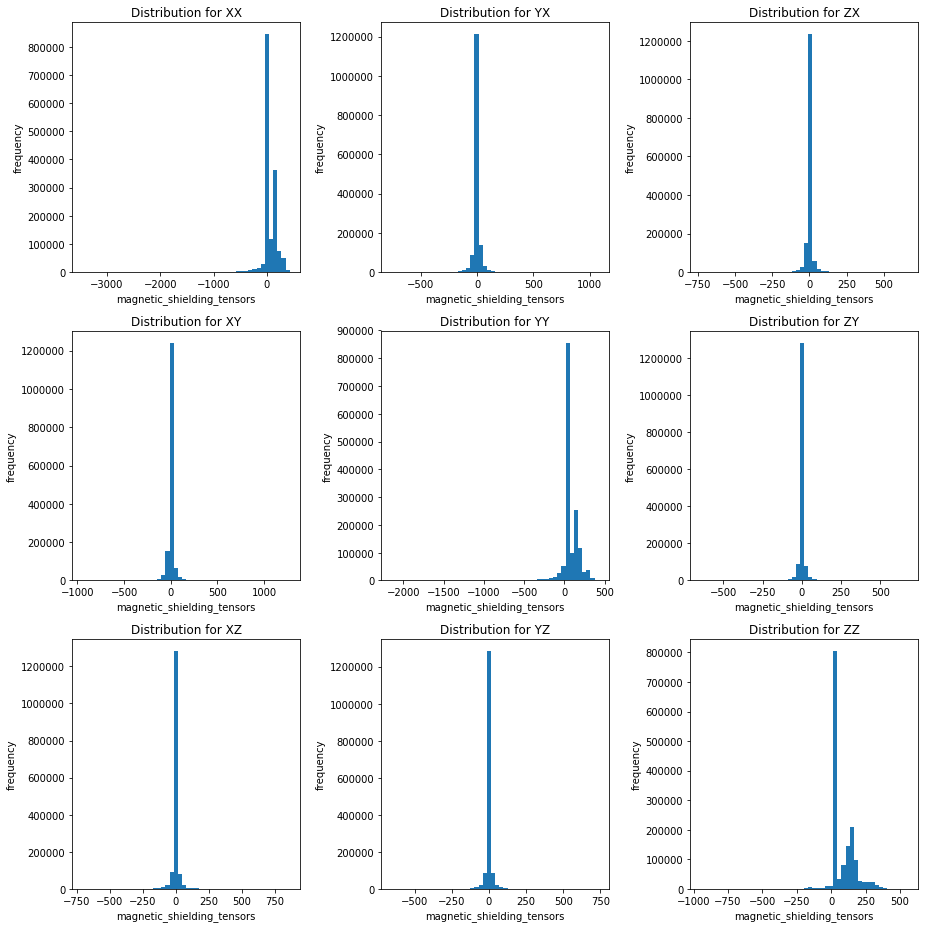

In [40]:
df = dataframes['magnetic_shielding_tensors']
axis_list = ['XX', 'YX', 'ZX', 'XY', 'YY', 'ZY', 'XZ', 'YZ', 'ZZ']
plt.figure(figsize=(13,13))
for i,type_ in enumerate(axis_list,1):
    plt.subplot(3, 3, i)
    plt.title('Distribution for '+ type_)
    plt.ylabel('frequency')
    plt.xlabel('magnetic_shielding_tensors')
    plt.hist(df[type_].values,bins=50)

plt.tight_layout()
plt.show()

## scalar coupling contributions

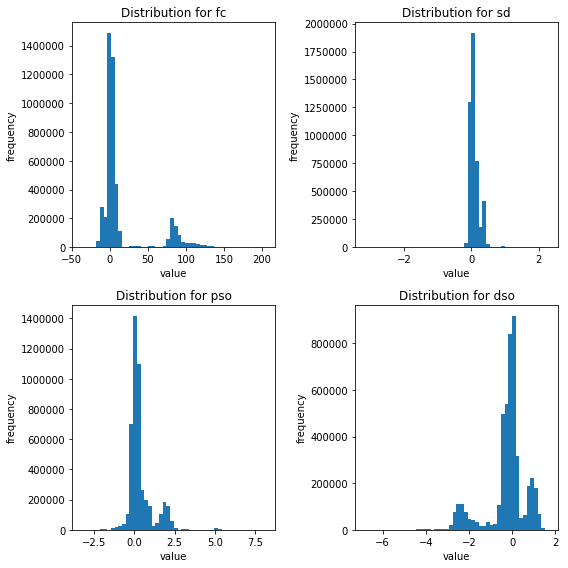

In [41]:
df = dataframes['scalar_coupling_contributions']
axis_list = ['fc', 'sd', 'pso', 'dso']
plt.figure(figsize=(8,8))
for i,type_ in enumerate(axis_list,1):
    plt.subplot(2, 2, i)
    plt.title('Distribution for '+ type_)
    plt.ylabel('frequency')
    plt.xlabel('value')
    plt.hist(df[type_].values,bins=50)

plt.tight_layout()
plt.show()

## Types of atoms

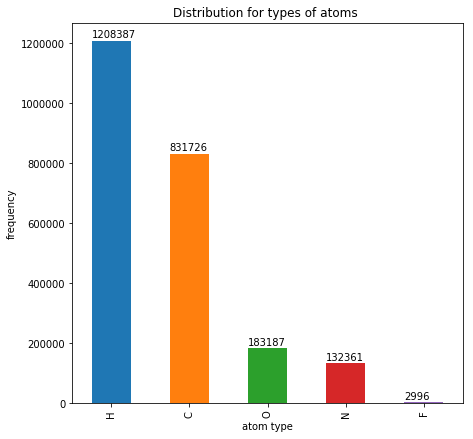

In [42]:
a = dataframes['structures']['atom'].value_counts()
plt.figure(figsize=(7,7))
a.plot.bar()
plt.title('Distribution for types of atoms ')
plt.ylabel('frequency')
plt.xlabel('atom type')
for i in range(a.shape[0]):
    plt.text(x=-0.25+i,y=a[i]+10000,s=str(a[i]), fontsize=10)
plt.show()

## Number of atoms in molecule

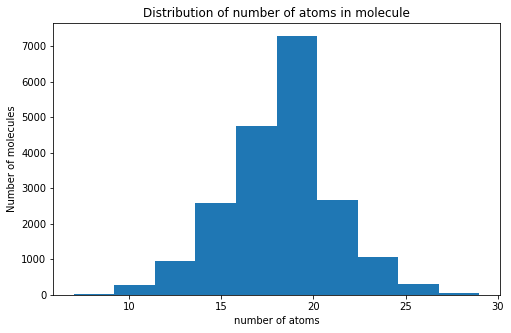

In [43]:
l = []
for i,f in enumerate(listdir(root+'structures/')):
    path = root+'structures/'+ f
    file = open(path,'r')
    l.append(int(file.readline()))
    file.close()
    if i == 20000: break ## take small sample
l = np.array(l)
plt.figure(figsize=(8,5))
plt.title('Distribution of number of atoms in molecule')
plt.ylabel('Number of molecules')
plt.xlabel('number of atoms')
plt.hist(l,bins=10)
plt.show()

In [44]:
print('minimum number atoms in a molecule for our sample is {}'.format(l.min()))
print('maximum number atoms in a molecule for our sample is {}'.format(l.max()))
print('average number atoms in a molecule for our sample is {}'.format(int(l.mean())))

minimum number atoms in a molecule for our sample is 7
maximum number atoms in a molecule for our sample is 29
average number atoms in a molecule for our sample is 18


## Coordinates

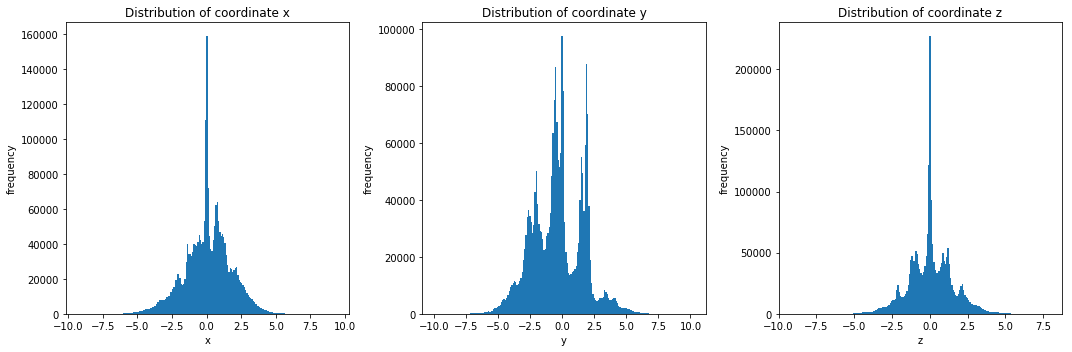

In [45]:
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.title('Distribution of coordinate x')
plt.ylabel('frequency')
plt.xlabel('x')
plt.hist(dataframes['structures']['x'].values,bins=200)

plt.subplot(1, 3, 2)
plt.title('Distribution of coordinate y')
plt.ylabel('frequency')
plt.xlabel('y')
plt.hist(dataframes['structures']['y'].values,bins=200)

plt.subplot(1, 3, 3)
plt.title('Distribution of coordinate z')
plt.ylabel('frequency')
plt.xlabel('z')
plt.hist(dataframes['structures']['z'].values,bins=200)

plt.tight_layout()
plt.show()